In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_mutual_info_score
import matplotlib.pyplot as plt

In [ ]:
def kmeans(X, K, itirations_number=100):
    num_of_samples,num_of_features = X.shape
    rows=np.random.choice(num_of_samples, K, replace=False)
    centroids = X[rows, :]
    for i in range(itirations_number):
        distances = np.array([np.linalg.norm(X - i, axis=1) for i in centroids])
        clusters = np.argmin(distances, axis=0)
        new = np.array([X[clusters == i, :].mean(axis=0) for i in range(K)])
        if np.all(centroids == new):
            break
        centroids = new
    return clusters, centroids

In [ ]:
data = fetch_openml('mnist_784')
X = data.data
scaler = StandardScaler()
X = scaler.fit_transform(X)
clusters, centroids = kmeans(X, K=10)
L = data.target.astype(int)
Label_Of_Cluster = np.array([L[clusters == i].mean() for i in range(10)])
predict = np.array([Label_Of_Cluster[i] for i in clusters])
L = mnist.target.astype(int)
Label_Of_Cluster = np.array([L[clusters == i].mean() for i in range(10)])
predict = np.array([Label_Of_Cluster[i] for i in clusters])
Accuracy = adjusted_mutual_info_score(L, predict)
print("accuracy:")
Accuracy*100

accuracy:


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


41.274317136694705

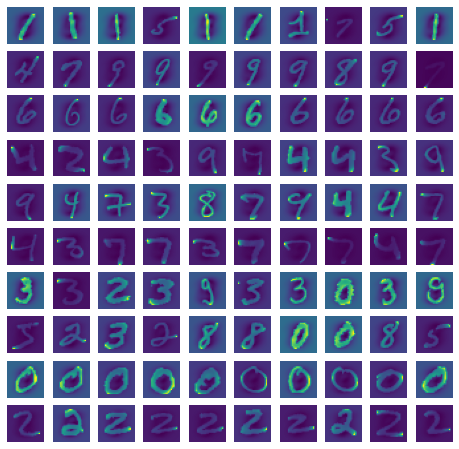

In [ ]:
fig, axs = plt.subplots(10, 10, figsize=(8, 8))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(X[clusters == i][j].reshape(28, 28))
        axs[i, j].axis('off')
plt.show()

second way for visualization